POISSON REGRESYON İLE TAHMİNLEME

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("data_cleaned.csv")

In [4]:
df = df[df['price'] > 0].copy()
X = df.drop(columns=['price'])
y = df['price']

In [5]:
categorical_features = ['location','city','district','neighborhood']
numerical_features   = ['room','living_room','area','age','floor']

In [6]:
preprocess = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
])

In [7]:
pipe_poisson = Pipeline([
    ('prep', preprocess),
    ('poisson', PoissonRegressor(alpha=1e-12, max_iter=300))
])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.23, random_state=6, 
)

In [9]:
pipe_poisson.fit(X_train, y_train)
y_pred = pipe_poisson.predict(X_test)

In [10]:
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.7444768650916953
MAE: 518572.88896169665


MAE = mean absolute error yani tahminle gerçek değerin sapma değeri.Benim için yaklaşık 500 bin tl'lik bir sapma payı var

In [11]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'merkez',
    'neighborhood': 'esentepe',
    'room': 2, 'living_room': 1, 'area': 100, 'age': 10, 'floor': 3
}])

price_pred = pipe_poisson.predict(new_house)[0]
print("Tahmin edilen fiyat (Poisson):", price_pred)


Tahmin edilen fiyat (Poisson): 2604496.967685276


In [12]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'merkez',
    'neighborhood': 'nazmi_saatçi',
    'room': 3, 'living_room': 1, 'area': 115, 'age': 23, 'floor': 2
}])

price_pred = pipe_poisson.predict(new_house)[0]
print("Tahmin edilen fiyat (Poisson):", price_pred)


Tahmin edilen fiyat (Poisson): 2602227.002167461


In [16]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'erkmen',
    'neighborhood': '',
    'room': 4, 'living_room': 1, 'area': 165, 'age': 0, 'floor': 3
}])

price_pred = pipe_poisson.predict(new_house)[0]
print("Tahmin edilen fiyat (Poisson):", price_pred)


Tahmin edilen fiyat (Poisson): 3938270.984072835


In [17]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'kanlıca',
    'neighborhood': '',
    'room': 2, 'living_room': 1, 'area': 95, 'age': 1, 'floor': 1
}])

price_pred = pipe_poisson.predict(new_house)[0]
print("Tahmin edilen fiyat (Poisson):", price_pred)


Tahmin edilen fiyat (Poisson): 2307582.334610639


In [18]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'kanlıca',
    'neighborhood': '',
    'room': 2, 'living_room': 1, 'area': 95, 'age': 1, 'floor': 1
}])

price_pred = pipe_poisson.predict(new_house)[0]
print("Tahmin edilen fiyat (Poisson):", price_pred)

Tahmin edilen fiyat (Poisson): 2307582.334610639


In [23]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'erenler',
    'neighborhood': '',
    'room': 2, 'living_room': 0, 'area': 50, 'age': 8, 'floor': 4
}])

price_pred = pipe_poisson.predict(new_house)[0]
print("Tahmin edilen fiyat (Poisson):", price_pred)


Tahmin edilen fiyat (Poisson): 1928701.596656288


In [24]:
new_house = pd.DataFrame([{
    'location': 'afyonkarahisar-merkez',
    'city': 'afyonkarahisar',
    'district': 'uydukent',
    'neighborhood': '',
    'room': 4, 'living_room': 1, 'area': 170, 'age': 0, 'floor': 3
}])

price_pred = pipe_poisson.predict(new_house)[0]
print("Tahmin edilen fiyat (Poisson):", price_pred)


Tahmin edilen fiyat (Poisson): 4021616.973269058


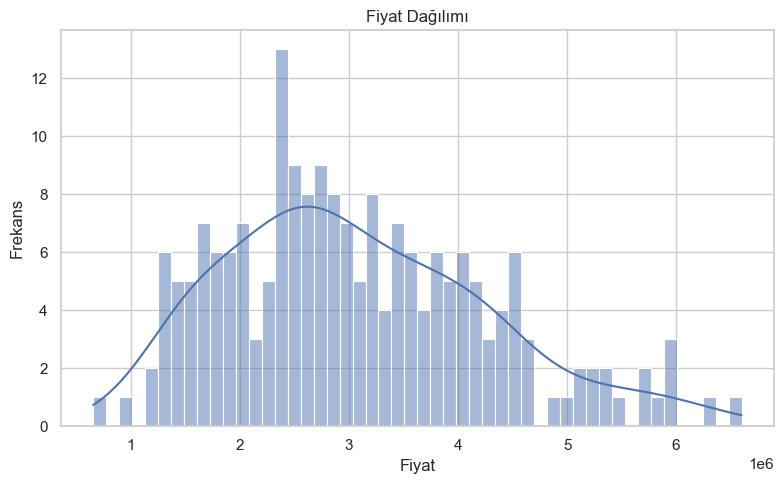

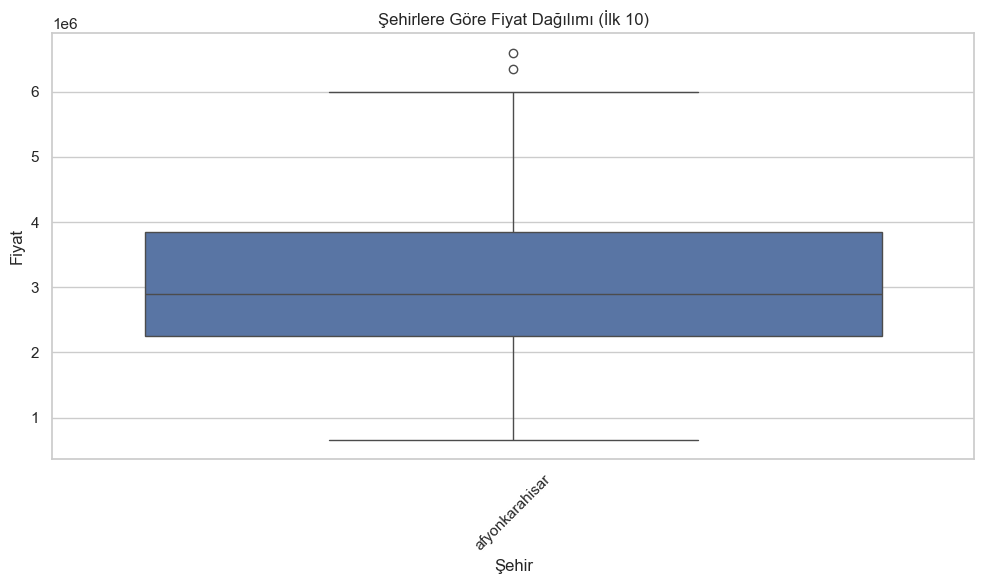

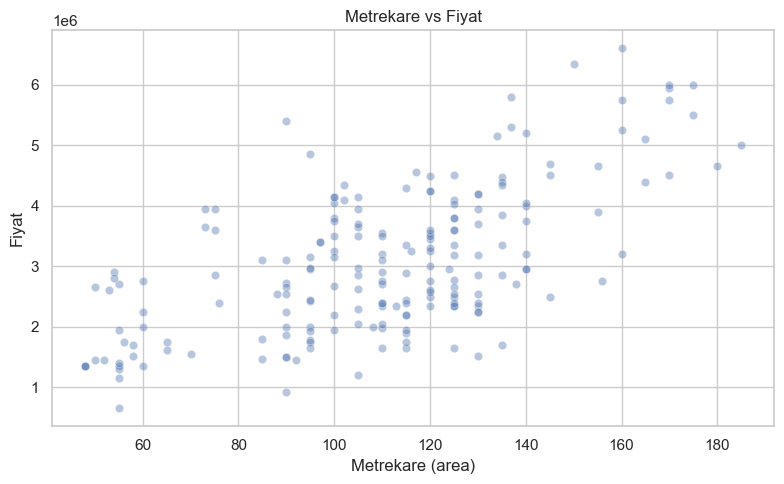

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme stilleri
sns.set(style="whitegrid", context="notebook")

# Hedef değişken dağılımı
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

# Şehir bazında fiyat kutu grafiği (ilk 10 şehir)
plt.figure(figsize=(10,6))
city_counts = df['city'].value_counts()
top_cities = city_counts.head(10).index
sns.boxplot(data=df[df['city'].isin(top_cities)], x='city', y='price')
plt.title('Şehirlere Göre Fiyat Dağılımı (İlk 10)')
plt.xlabel('Şehir')
plt.ylabel('Fiyat')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Metrekareye göre fiyat dağılımı
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='area', y='price', alpha=0.4)
plt.title('Metrekare vs Fiyat')
plt.xlabel('Metrekare (area)')
plt.ylabel('Fiyat')
plt.tight_layout()
plt.show()


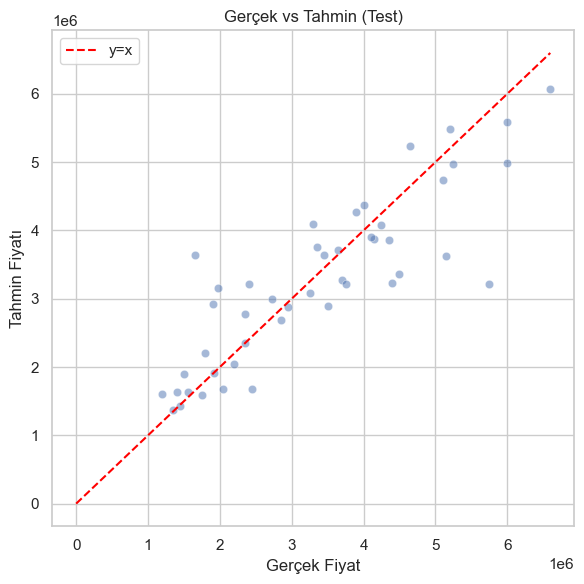

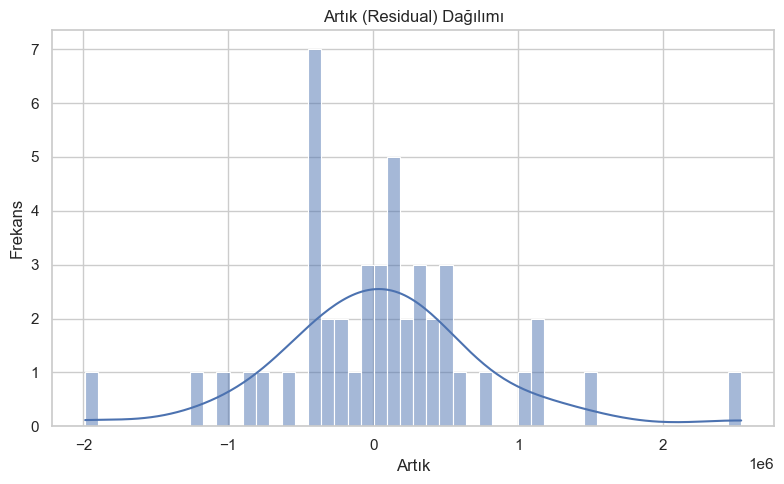

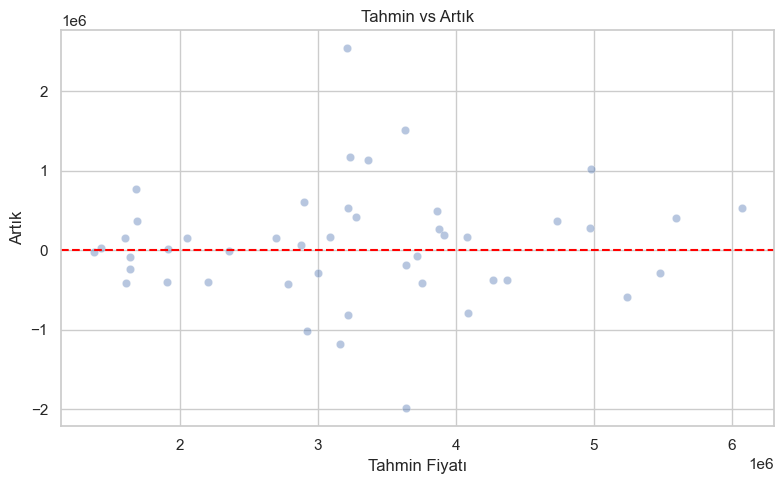

In [14]:
# Tahmin vs Gerçek ve Artık Analizi
from sklearn.metrics import mean_squared_error

# Test seti için tahminler zaten var: y_pred
results = pd.DataFrame({
    'y_test': y_test.reset_index(drop=True),
    'y_pred': pd.Series(y_pred)
})
results['residual'] = results['y_test'] - results['y_pred']

# Predicted vs Actual
plt.figure(figsize=(6,6))
sns.scatterplot(data=results, x='y_test', y='y_pred', alpha=0.5)
max_val = max(results['y_test'].max(), results['y_pred'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='y=x')
plt.title('Gerçek vs Tahmin (Test)')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Fiyatı')
plt.legend()
plt.tight_layout()
plt.show()

# Residual histogram
plt.figure(figsize=(8,5))
sns.histplot(results['residual'], bins=50, kde=True)
plt.title('Artık (Residual) Dağılımı')
plt.xlabel('Artık')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(data=results, x='y_pred', y='residual', alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Tahmin vs Artık')
plt.xlabel('Tahmin Fiyatı')
plt.ylabel('Artık')
plt.tight_layout()
plt.show()


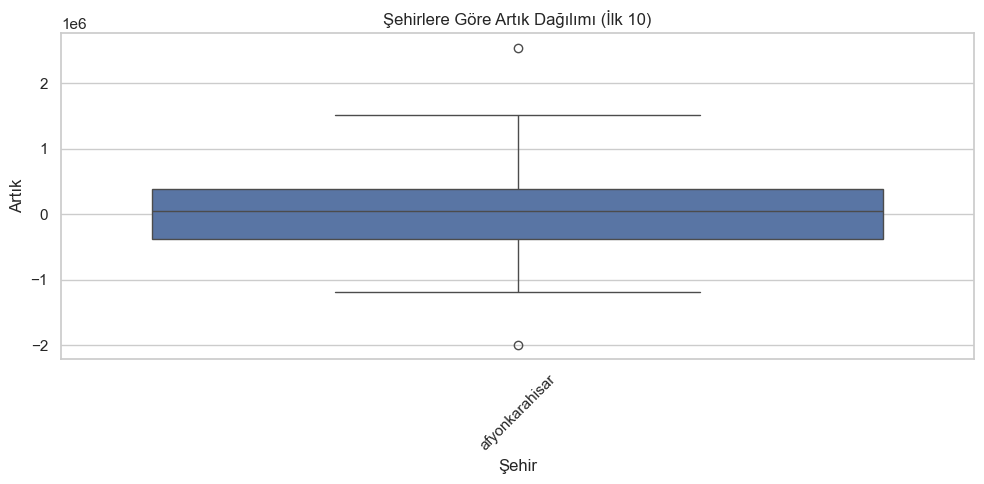

In [15]:
# Şehre göre hatalar (test seti)
# X_test ile şehir bilgisini eşleştirip residual'ları şehir bazında inceleyelim
# Not: Pipeline içindeki OneHotEncoder nedeniyle X_test dönüştürülmüştür; bu yüzden orijinal X_test'e erişiyoruz.

# Orijinal test indekslerini al
X_test_original = X_test.copy()
X_test_original = X_test_original.reset_index(drop=True)

results_city = results.copy()
results_city['city'] = X_test_original['city']

plt.figure(figsize=(10,5))
order = results_city.groupby('city')['residual'].median().abs().sort_values(ascending=False).head(10).index
sns.boxplot(data=results_city[results_city['city'].isin(order)], x='city', y='residual', order=order)
plt.title('Şehirlere Göre Artık Dağılımı (İlk 10)')
plt.xlabel('Şehir')
plt.ylabel('Artık')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
